## <div align=center> ANALISIS METODE K-NEAREST NEIGHBOR (KNN)

## <div align=center> DALAM MEMPREDIKSI PERGERAKAN SAHAM PT BANK CENTRAL ASIA TBK.

### EDA

#### Import Library

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_error , r2_score
import math

#### Memanggil dataset yang akan digunakan 

In [3]:
df = pd.read_csv('BBCA.JK 10-12.csv')
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2723,2022-12-19,8650.0,8700.0,8600.0,8650.0,8650.0,67482900
2724,2022-12-20,8550.0,8650.0,8550.0,8575.0,8575.0,41243700
2725,2022-12-21,8600.0,8700.0,8575.0,8675.0,8675.0,33617700
2726,2022-12-22,8650.0,8675.0,8575.0,8575.0,8575.0,59591500
2727,2022-12-23,8525.0,8575.0,8500.0,8500.0,8500.0,47393000
2728,2022-12-26,8500.0,8625.0,8500.0,8575.0,8575.0,20495900
2729,2022-12-27,8600.0,8650.0,8575.0,8600.0,8600.0,27193800
2730,2022-12-28,8650.0,8650.0,8550.0,8650.0,8650.0,40420200
2731,2022-12-29,8525.0,8600.0,8500.0,8575.0,8575.0,47020900
2732,2022-12-30,8575.0,8650.0,8550.0,8550.0,8550.0,44681400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733 entries, 0 to 2732
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2733 non-null   object 
 1   Open       2733 non-null   float64
 2   High       2733 non-null   float64
 3   Low        2733 non-null   float64
 4   Close      2733 non-null   float64
 5   Adj Close  2733 non-null   float64
 6   Volume     2733 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 149.6+ KB


Karena tipe data Date masih object maka perlu diubah ke DateTime.

### PreProcessing Data

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
print(df)

           Date    Open    High     Low   Close    Adj Close    Volume
0    2012-01-02  1600.0  1600.0  1590.0  1600.0  1375.585205   7870000
1    2012-01-03  1620.0  1620.0  1590.0  1620.0  1392.780151  27775000
2    2012-01-04  1620.0  1630.0  1600.0  1620.0  1392.780151  87245000
3    2012-01-05  1610.0  1630.0  1610.0  1610.0  1384.182983  57197500
4    2012-01-06  1600.0  1610.0  1590.0  1600.0  1375.585205  27190000
...         ...     ...     ...     ...     ...          ...       ...
2728 2022-12-26  8500.0  8625.0  8500.0  8575.0  8575.000000  20495900
2729 2022-12-27  8600.0  8650.0  8575.0  8600.0  8600.000000  27193800
2730 2022-12-28  8650.0  8650.0  8550.0  8650.0  8650.000000  40420200
2731 2022-12-29  8525.0  8600.0  8500.0  8575.0  8575.000000  47020900
2732 2022-12-30  8575.0  8650.0  8550.0  8550.0  8550.000000  44681400

[2733 rows x 7 columns]


In [7]:
df.shape

(2733, 7)

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Pembuatan Model dan Implementasi Algoritma K-Nearest Neighbors

In [9]:
#prepare dataset to work with 
bca_df=df[['Date','High','Open','Low','Close']]
bca_df.head(10)

,Date,High,Open,Low,Close
0,2012-01-02,1600.0,1600.0,1590.0,1600.0
1,2012-01-03,1620.0,1620.0,1590.0,1620.0
2,2012-01-04,1630.0,1620.0,1600.0,1620.0
3,2012-01-05,1630.0,1610.0,1610.0,1610.0
4,2012-01-06,1610.0,1600.0,1590.0,1600.0
5,2012-01-09,1630.0,1630.0,1580.0,1630.0
6,2012-01-10,1640.0,1630.0,1620.0,1630.0
7,2012-01-11,1650.0,1620.0,1610.0,1620.0
8,2012-01-12,1640.0,1630.0,1610.0,1630.0
9,2012-01-13,1630.0,1600.0,1600.0,1600.0


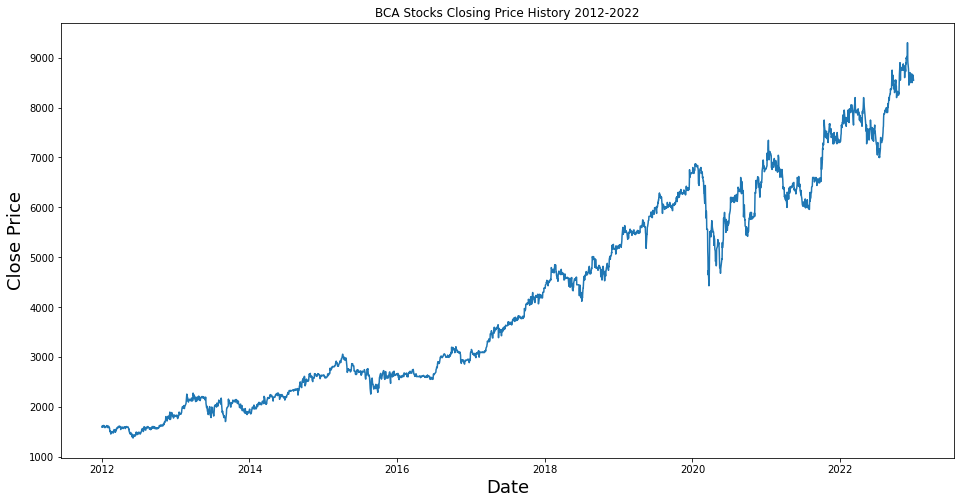

In [10]:
plt.figure(figsize=(16,8))
plt.title('BCA Stocks Closing Price History 2012-2022')
plt.plot(bca_df['Date'],bca_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

#### Model training dan testing

In [11]:
bca_df['Year']=df['Date'].dt.year
bca_df['Month']=df['Date'].dt.month
bca_df['Day']=df['Date'].dt.day

C:\Users\user\AppData\Local\Temp\ipykernel_27688\2619449436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bca_df['Year']=df['Date'].dt.year


In [12]:
nfx_df=bca_df[['Date','Day','Month','Year','High','Open','Low','Close']]
nfx_df.head(10)

,Date,Day,Month,Year,High,Open,Low,Close
0,2012-01-02,2,1,2012,1600.0,1600.0,1590.0,1600.0
1,2012-01-03,3,1,2012,1620.0,1620.0,1590.0,1620.0
2,2012-01-04,4,1,2012,1630.0,1620.0,1600.0,1620.0
3,2012-01-05,5,1,2012,1630.0,1610.0,1610.0,1610.0
4,2012-01-06,6,1,2012,1610.0,1600.0,1590.0,1600.0
5,2012-01-09,9,1,2012,1630.0,1630.0,1580.0,1630.0
6,2012-01-10,10,1,2012,1640.0,1630.0,1620.0,1630.0
7,2012-01-11,11,1,2012,1650.0,1620.0,1610.0,1620.0
8,2012-01-12,12,1,2012,1640.0,1630.0,1610.0,1630.0
9,2012-01-13,13,1,2012,1630.0,1600.0,1600.0,1600.0


In [13]:
#separate Independent and dependent variable
X = nfx_df[['Day', 'Month', 'Year']]
# X = nfx_df['Date'].values.reshape(-1, 1)
Y= nfx_df['Close'].values

print(X)
print(Y)

      Day  Month  Year
0       2      1  2012
1       3      1  2012
2       4      1  2012
3       5      1  2012
4       6      1  2012
...   ...    ...   ...
2728   26     12  2022
2729   27     12  2022
2730   28     12  2022
2731   29     12  2022
2732   30     12  2022

[2733 rows x 3 columns]
[1600. 1620. 1620. ... 8650. 8575. 8550.]


#### Splitting to train and test

In [15]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20)
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

#### Checking accuracy

In [16]:
knn_kfold = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  93.07636207605275


#### Visualisasi Model

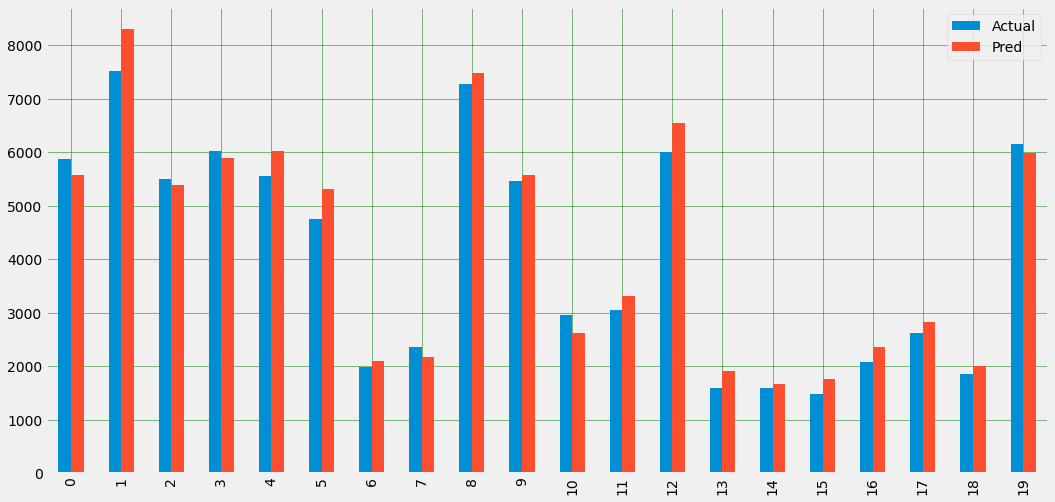

In [17]:
#Plot Actual and Predicted
plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluasi Model

In [18]:
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error',knn_mse)

KNN Model Root mean square error 336.78759872429833


In [19]:
print('KNN R2: ', r2_score(y_test, y_knn_pred))

KNN R2:  0.9736277516917573


### Deployment Model to Predicted for next 365 days

In [20]:
data_tanggal= pd.to_datetime(df['Date'])
data_tanggal = data_tanggal.iloc[-1]

#Generate data satu tahun kedepan
data_tanggal_prediksi = pd.date_range(start=data_tanggal, periods=365, freq='D')
X_future = pd.DataFrame()
X_future['Day'] = data_tanggal_prediksi.day
X_future['Month'] = data_tanggal_prediksi.month
X_future['Year'] = data_tanggal_prediksi.year

print("Tanggal Terakhir: ", data_tanggal)
X_future.head()
# X_future
# X_future = np.array(data_tanggal_prediksi).reshape(-1, 1)
y_pred_future = knn_model.predict(X_future)

Tanggal Terakhir:  2022-12-30 00:00:00


#### Checking model's accuracy

In [21]:
knn_kfold = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, X_future, y_pred_future, cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  84.10980895009784


#### Visualisasi Model

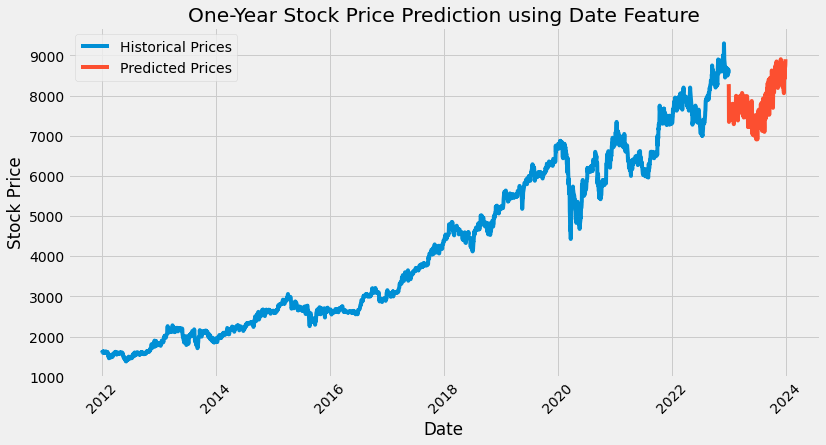

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical Prices')
plt.plot(data_tanggal_prediksi, y_pred_future, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('One-Year Stock Price Prediction using Date Feature')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()